In [9]:
%matplotlib inline

import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

3.5.1 |Anaconda 4.0.0 (x86_64)| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]
1.10.4
0.18.0


# 1.Which sectors are the biggest employers?

In [20]:
# this skips the first row of data
df = pd.read_csv('SBO_2012_00CSA03_with_ann.csv', header = 1)


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


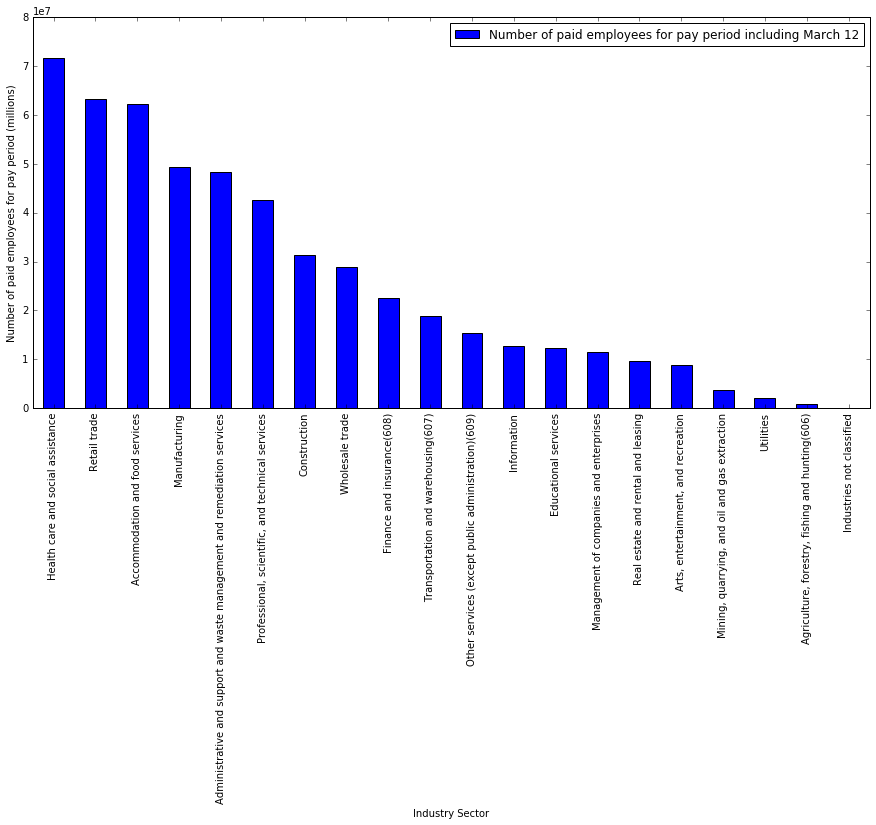

In [14]:

# create a function to convert string to numeric
to_int = lambda x : int(x) if x.isnumeric()== True else  np.nan

#slecting relevant columns from data frame for analysis
df_selected = df[['2012 NAICS code','Meaning of 2012 NAICS code','Number of paid employees for pay period including March 12']]

#converting string value to int 
# this was needed as there were character values in 'Number of paid employees for pay period including March 12' column. Now they will be NaN
df_selected['Number of paid employees for pay period including March 12'] = df_selected['Number of paid employees for pay period including March 12'].apply(to_int)

#calculating total employees by industry sector
df_selected_grouped = df_selected.groupby('Meaning of 2012 NAICS code')['Number of paid employees for pay period including March 12'].sum().to_frame()
df_selected_grouped = df_selected_grouped.reset_index() 

#scrubbing data getting rid of row with total values 
df_selected_grouped = df_selected_grouped[df_selected_grouped['Meaning of 2012 NAICS code'] != 'Total for all sectors' ]

#sorting data by industry sector
df_selected_grouped= df_selected_grouped.sort( 'Number of paid employees for pay period including March 12', ascending = 0)

#plotting data
df_selected_grouped.plot( 'Meaning of 2012 NAICS code','Number of paid employees for pay period including March 12',kind='bar', figsize=(15,7))
plt.ylabel('Number of paid employees for pay period (millions)')
plt.xlabel('Industry Sector')
plt.yscale('linear')
 

# 2. Which sectors (NAICS Code) have the highest earnings per paid employee?

In [21]:
#selecting relevant columns for analysis
df_selected = df[[ 'Meaning of 2012 NAICS code','Number of paid employees for pay period including March 12','Annual payroll ($1,000)']]
#df_selected
#converting string value to int 
# this was needed as there were character values in 'Number of paid employees for pay period including March 12' column. Now they will be NaN
df_selected['Number of paid employees for pay period including March 12'] = df_selected['Number of paid employees for pay period including March 12'].apply(to_int)
df_selected['Annual payroll ($1,000)'] = df_selected['Annual payroll ($1,000)'].apply(to_int)

#calculating total employees by industry sector
df_selected_grouped = df_selected.groupby('Meaning of 2012 NAICS code')['Number of paid employees for pay period including March 12','Annual payroll ($1,000)' ].sum()
df_selected_grouped = df_selected_grouped.reset_index() 

#calculating annual salary per employee
df_selected_grouped['Average Annual Salry/Employee']  = 1000 * df_selected_grouped['Annual payroll ($1,000)' ]/df_selected_grouped['Number of paid employees for pay period including March 12']

#sorting data by industry sector
df_selected_grouped= df_selected_grouped.sort( 'Average Annual Salry/Employee', ascending = 0)

#listing occupations by salary
df_selected_grouped

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Meaning of 2012 NAICS code,Number of paid employees for pay period including March 12,"Annual payroll ($1,000)",Average Annual Salry/Employee
10,Management of companies and enterprises,11416996.0,1.088458e+09,95336.608509
19,Utilities,2033550.0,1.817444e+08,89372.959603
6,Finance and insurance(608),22621713.0,1.906164e+09,84262.581441
9,Information,12691106.0,1.010076e+09,79589.294188
12,"Mining, quarrying, and oil and gas extraction",3606452.0,2.427759e+08,67317.104733
14,"Professional, scientific, and technical services",42542852.0,2.609298e+09,61333.400309
20,Wholesale trade,28931519.0,1.663354e+09,57492.799151
11,Manufacturing,49434281.0,2.486563e+09,50300.375523
4,Construction,31266965.0,1.510873e+09,48321.709702
15,Real estate and rental and leasing,9649783.0,4.151286e+08,43019.477018


# 4.	Which industries in USA (2012) have the highest number of companies?  


Relative (% of total) number of companies is used instead of absolute value.

In [71]:
##make a heading out of the first row 
uc=pd.read_csv('SBO_2012_00CSA03_with_ann.csv', header = 0)
#uc.head(10)

##reset an index so tha it starts with '1'
uc1=uc.drop(uc.index[[0]])
#uc1.head()

## remove some solumns from the data frame that are no interest
uc2=uc1.drop(['GEO.id','GEO.id2','GEO.display-label'],axis=1)
#uc2.head()

##get the names of all columns in the dataframe:
#uc2.columns

##because some column's names (e.g. 'NAICS.display-label" -contains dots and '-' sign) may cause exceptions it is better 
##to re-name them.
uc2.columns=['NAICS_id', 'NAICS_display_label', 'VET_GROUP_id',
       'VET_GROUP_display_label', 'ETH_GROUP_id', 'ETH_GROUP_display_label',
       'YEAR_id', 'FIRMALL', 'RCPALL', 'FIRMPDEMP', 'RCPPDEMP', 'EMP',
       'PAYANN', 'FIRMNOPD', 'RCPNOPD', 'FIRMALL_S', 'RCPALL_S', 'FIRMPDEMP_S',
       'RCPPDEMP_S', 'EMP_S', 'PAYANN_S', 'FIRMNOPD_S', 'RCPNOPD_S']
#uc2.head()

##filter only 'All firms' fields for further analysis
vet_group_filter=uc2.VET_GROUP_display_label == 'All firms'
eth_group_filter=uc2.ETH_GROUP_display_label == 'All firms'
uc_industries=uc2[vet_group_filter & eth_group_filter]
uc_industries.set_index('NAICS_display_label', inplace=True)
#uc_industries.head()

## check what type are the columns that contains something that looks like numbers:
total_FIRMALL=uc_industries['FIRMALL'][1]
#type(total_FIRMALL)

#convert data in columns that look like numbers (but actually strings) into numeric format:
uc_industries_num=uc_industries[['FIRMALL' ,'RCPALL','FIRMPDEMP','RCPPDEMP','EMP','PAYANN','FIRMNOPD','RCPNOPD']].apply(pd.to_numeric)
#uc_industries_num

##calculate percent (%) of total number of companies for each industry
uc_num_of_companies_percent=uc_industries_num['FIRMALL']*100/uc_industries_num['FIRMALL'][0]

##skip the first row ("total for all sectors')
uc_num_of_companies_percent[1:21]


NAICS_display_label
Agriculture, forestry, fishing and hunting(606)                              0.926166
Mining, quarrying, and oil and gas extraction                                0.472853
Utilities                                                                    0.085581
Construction                                                                10.642698
Manufacturing                                                                2.131989
Wholesale trade                                                              2.547082
Retail trade                                                                 9.117415
Transportation and warehousing(607)                                          4.391462
Information                                                                  1.404778
Finance and insurance(608)                                                   3.476803
Real estate and rental and leasing                                           9.704290
Professional, scientific, and tech

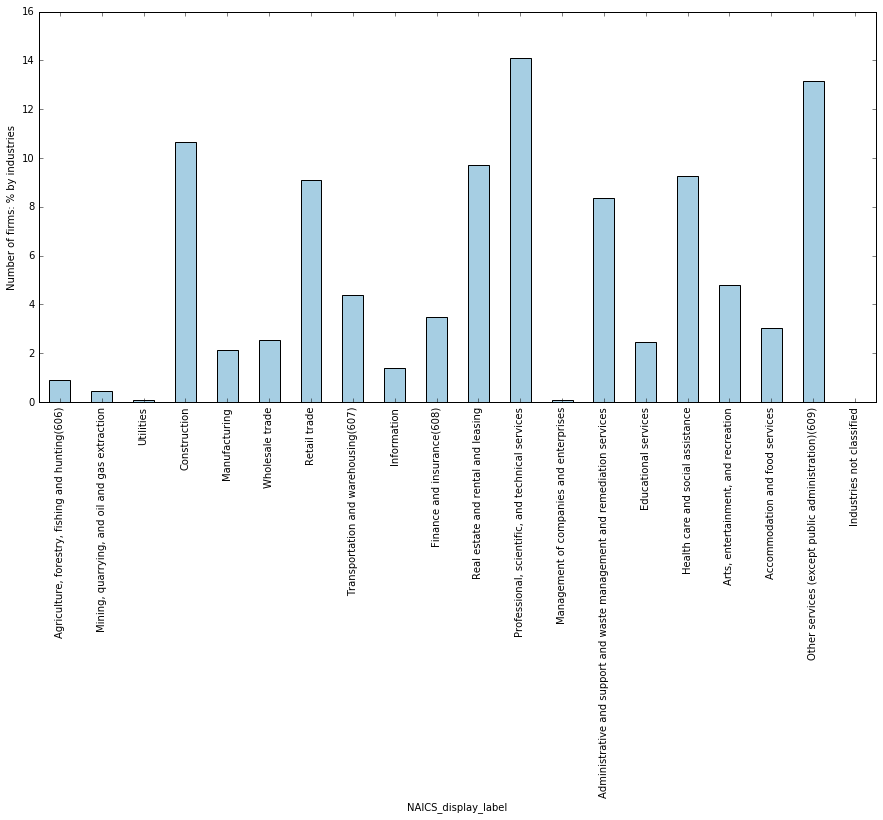

In [72]:
#This graph is an answer to the following question:
##What are the predominant industries in USA (2012) by number of companies in this industries, % of total number
##Or 'What are the most represented industries in USA 2012"
import matplotlib.pyplot as plt
uc_num_of_companies_percent[1:21].plot(kind='bar', figsize=(15,7),colormap='Paired')
plt.ylabel('Number of firms: % by industries')

Conclusion: that result doesn't seem very surprising, because it is logical that those type of companies (Legal Services, accounting, tax preparaton, Architectural, Engineering, and Related Services,Computer Systems Design and Related Services, Scientific Research and Development Services - e.g. pharmaceutical R&D - are small but numerous (e.g. a lot of computer start-ups), so that in terms of number of firms they dominate the economy.

# 5. What are the RICHEST industries in USA (2012) by sales, receipts, or value of shipments 

Relative (% of total) sales, receipts, value of shipments in $1'000 is used instead of absolute value.

In [73]:
##calculate % of total per industry ('RCPALL' = Sales, receipts, or value of shipments of firms with or without 
#paid employees ($1,000))
uc_sales_percent=uc_industries_num['RCPALL']*100/uc_industries_num['RCPALL'][0]

##That is the Table view of the data
uc_sales_percent[1:21]

NAICS_display_label
Agriculture, forestry, fishing and hunting(606)                              0.120831
Mining, quarrying, and oil and gas extraction                                1.774702
Utilities                                                                    1.575621
Construction                                                                 4.433520
Manufacturing                                                               17.523045
Wholesale trade                                                             23.737158
Retail trade                                                                12.784105
Transportation and warehousing(607)                                          2.670133
Information                                                                  3.741373
Finance and insurance(608)                                                  10.892554
Real estate and rental and leasing                                           2.139177
Professional, scientific, and tech

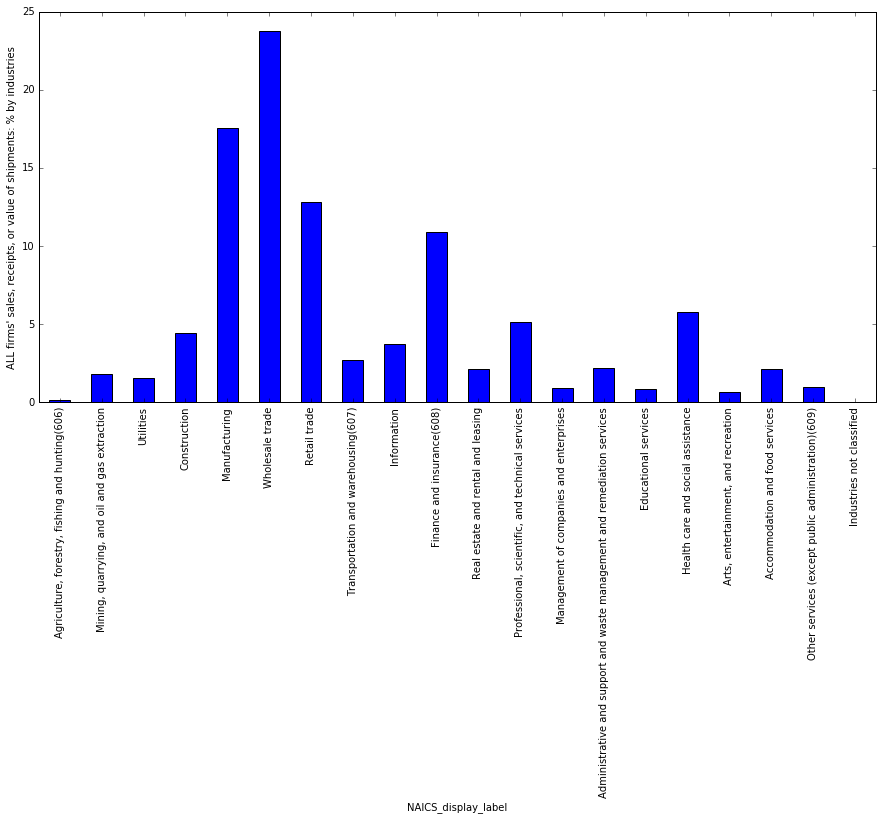

In [74]:
##This is the graph representation of the data
import matplotlib.pyplot as plt
uc_sales_percent[1:21].plot(kind='bar', figsize=(15,7))
plt.ylabel('ALL firms\' sales, receipts, or value of shipments: % by industries')


CONCLUSION. Wholesale trade is the richest sector of the economy, which is predictable, but I would personally bet that it is Finance and Insurance.
However, the second richest industry - not far behind the first one is ... Manufactoring and (for me at least) that was surprising, the impression given by mainstream media is that manufacturing is shipped abroad:(. Well, some polls suggest that very small percentage of populaton in US trust the mainstream media. I see why (now:))

# 6.	Which industry's average percentage of companies with paid employees is the highest/the lowest?


In [75]:
##calculated the % of companies with paid employees (each industry0 ) as % of total number of companies
uc_industries_num.copy()
uc_firms_w_paid_employees = uc_industries_num.copy()
uc_firms_w_paid_employees['% of firms with paid employees'] = uc_industries_num['FIRMPDEMP']*100/uc_industries_num['FIRMALL']

#uc_firms_w_paid_employees

In [76]:
##table view of the data
uc_firms_w_paid_employees['% of firms with paid employees'][1:21]

NAICS_display_label
Agriculture, forestry, fishing and hunting(606)                               8.164430
Mining, quarrying, and oil and gas extraction                                16.883306
Utilities                                                                    24.721905
Construction                                                                 21.930487
Manufacturing                                                                43.712892
Wholesale trade                                                              44.676452
Retail trade                                                                 25.810125
Transportation and warehousing(607)                                          13.826068
Information                                                                  18.398872
Finance and insurance(608)                                                   24.232546
Real estate and rental and leasing                                           10.106448
Professional, scientifi

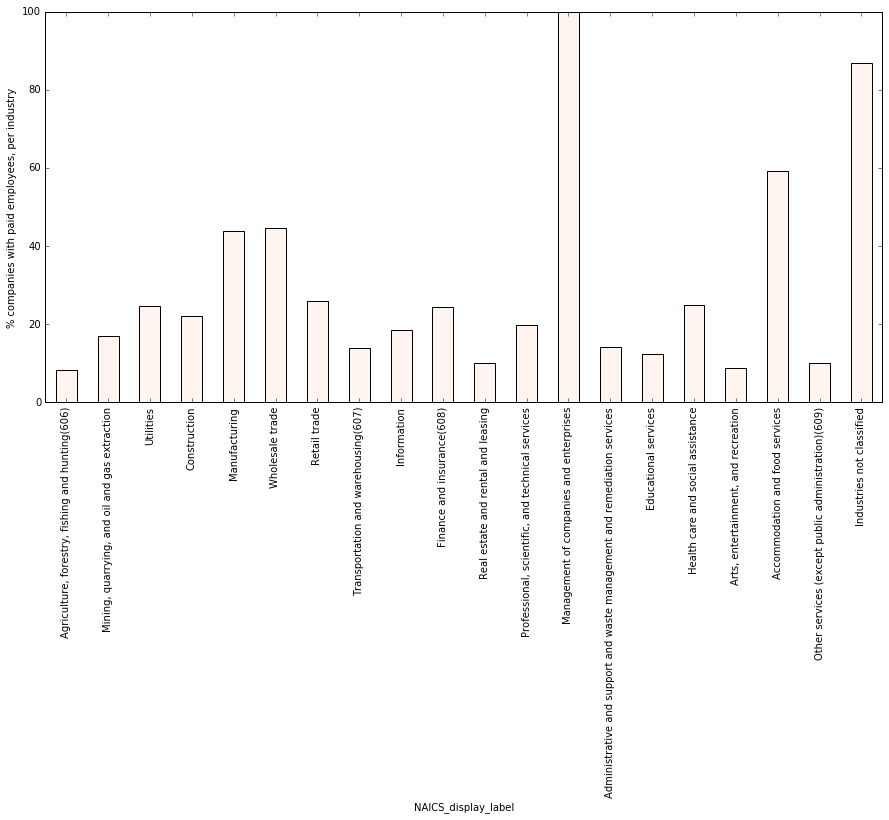

In [77]:
#Graphical representation 

import matplotlib.pyplot as plt
uc_firms_w_paid_employees['% of firms with paid employees'][1:21].plot(kind='bar', figsize=(15,7),colormap='Reds')
plt.ylabel('% companies with paid employees, per industry')

CONCLUSION:
(1) The lowest % of companies with paid employees happen to be Agriculture, forestry, fishing and hunting(606) . Is that because a lot of farms are owned by families, that usually do not employ other people or in agriculture, forestry, fishing and hunting one can employ a lot of students and illegal immigrants?
(2) The highest % of companies with paid employees ... is 'Management of companies and enterprises'. One can see that, as an employer you might never find fools who would manage your other employees for RFREE!

# 7.	What is average pay across all industries in US in 2012? What is average paycheck per industry/employee?


In [79]:
##calcualted average pay per industry
##'PAYANN'= nnual payroll ($1,000)
##'EMP' = Number of paid employees for pay period including March 12
uc_average_pay = uc_industries_num.copy()
uc_average_pay['average pay per employee, ($1000)'] = uc_industries_num['PAYANN']/uc_industries_num['EMP']
#uc_average_pay


##What is average pay across all industries in US in 2012:
print('average pay in US across industries:', round(uc_average_pay['average pay per employee, ($1000)'][0],2),'thousand dollars')


average pay in US across industries: 45.44 thousand dollars


In [80]:
##Table view of the data
uc_average_pay['average pay per employee, ($1000)'][1:21]

NAICS_display_label
Agriculture, forestry, fishing and hunting(606)                             35.756452
Mining, quarrying, and oil and gas extraction                               70.610499
Utilities                                                                   90.384393
Construction                                                                49.385399
Manufacturing                                                               52.938673
Wholesale trade                                                             61.625059
Retail trade                                                                25.183416
Transportation and warehousing(607)                                         42.792263
Information                                                                 81.340924
Finance and insurance(608)                                                  86.908730
Real estate and rental and leasing                                          44.907502
Professional, scientific, and tech

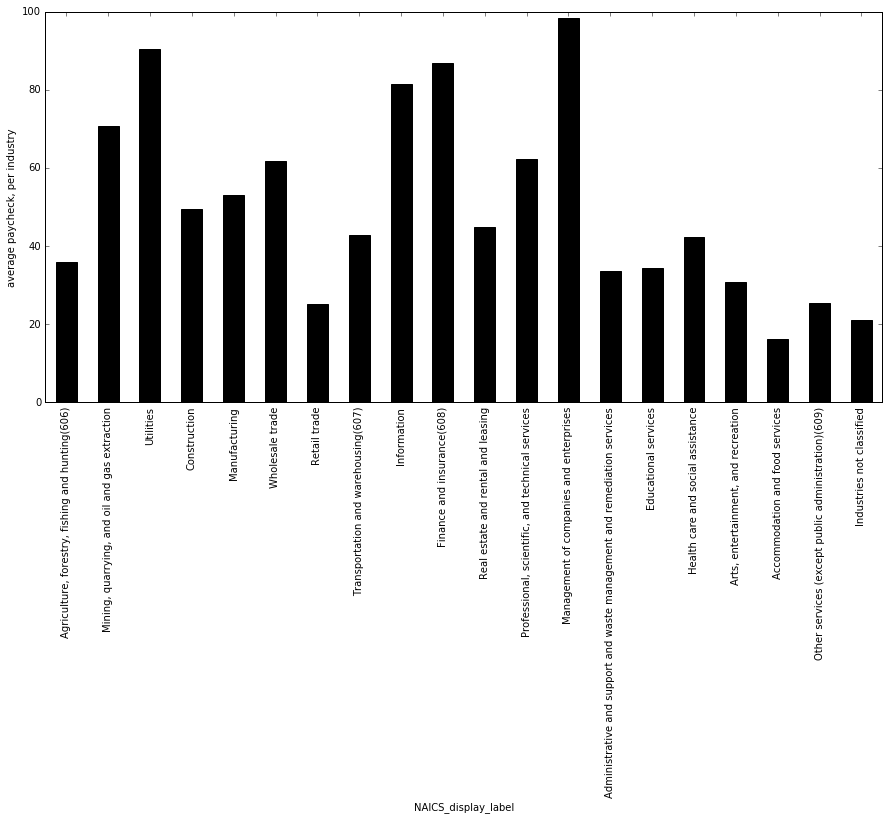

In [81]:
#Graphical representaton

import matplotlib.pyplot as plt
uc_average_pay['average pay per employee, ($1000)'][1:21].plot(kind='bar', figsize=(15,7), color='0')
plt.ylabel('average paycheck, per industry')

CONCLUSION. 
Management of companies and enterprises the best paid industry with average salary of 98K per employee. That explains the conclusion for question #6 .
Second highest paid sector is Utilities with average of 90K , thanks to unions, I guess.
Third one is FInance and Insurance following by Information (not really a surpricse discovery)

The least paid employees are 'The Accommodation and Food Services ' sector with unbelievably low average salary of 16K, below is the definition of what they do:
"The Accommodation and Food Services sector comprises establishments providing customers with lodging and/or preparing meals, snacks, and beverages for immediate consumption. The sector includes both accommodation and food services establishments because the two activities are often combined at the same establishment."
NO COMMENTS...
